In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
                       
education = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [11]:
education2 = education.copy()

fill_list = ['ENROLL',
             'TOTAL_REVENUE',
             'FEDERAL_REVENUE',
             'STATE_REVENUE',
             'LOCAL_REVENUE',
             'TOTAL_EXPENDITURE',
             'INSTRUCTION_EXPENDITURE',
             'SUPPORT_SERVICES_EXPENDITURE',
             'OTHER_EXPENDITURE',
             'CAPITAL_OUTLAY_EXPENDITURE',
             'GRADES_PK_G',
             'GRADES_KG_G',
             'GRADES_4_G',
             'GRADES_8_G',
             'GRADES_12_G',
             'GRADES_1_8_G',
             'GRADES_9_12_G',
             'GRADES_ALL_G',
             'AVG_MATH_4_SCORE',
             'AVG_MATH_8_SCORE',
             'AVG_READING_4_SCORE',
             'AVG_READING_8_SCORE']

for col in fill_list:
    education2.loc[:, col] = education2.loc[:, col].interpolate()
    
for col in fill_list:
    education2.loc[:, col] = education2.loc[:, col].fillna(education2.loc[:, col].mean())

In [12]:
print(education2.isnull().sum())
display(education2)

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,1.005984e+06,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.267799
1,1992_ALASKA,ALASKA,1992,1.005984e+06,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,211.790904,258.776900,207.088116,258.859712
2,1992_ARIZONA,ARIZONA,1992,1.005984e+06,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,1.005984e+06,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,1.005984e+06,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,265.519676
5,1992_COLORADO,COLORADO,1992,1.005984e+06,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,1.005984e+06,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,1.005984e+06,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,1.005984e+06,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,1.005984e+06,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Text(0.5, 1.0, 'Expediture')

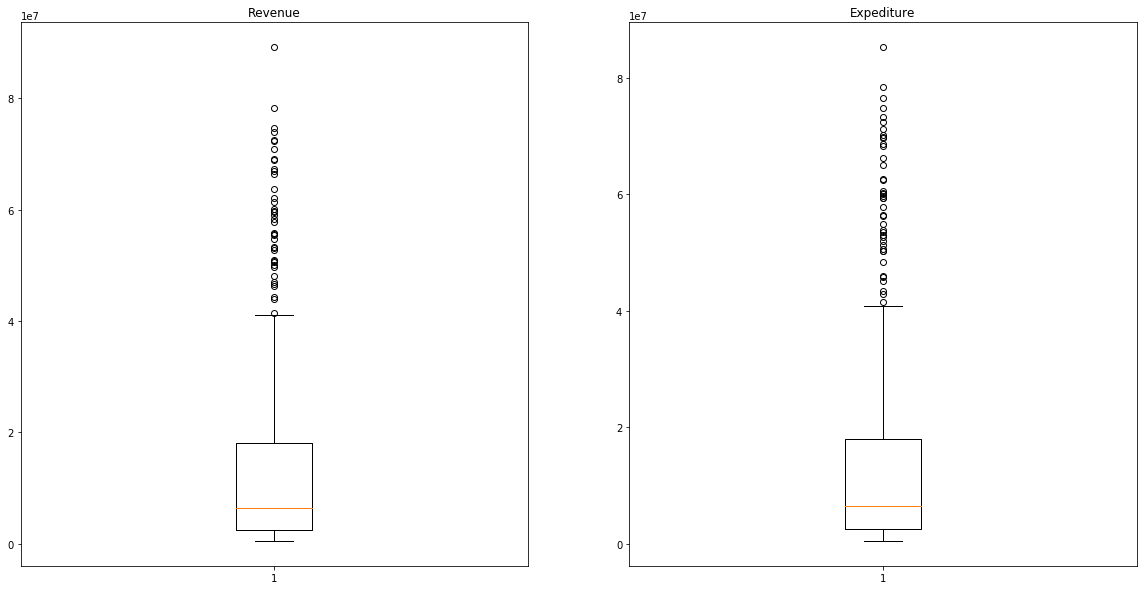

In [14]:
plt.subplots(figsize=(20,10))
plt.subplot(121)
ax = plt.boxplot(education2['TOTAL_REVENUE'])
plt.title('Revenue')
plt.subplot(122)
ax1 = plt.boxplot(education2['TOTAL_EXPENDITURE'])
plt.title('Expediture')

## If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [21]:
winsorize_expenditure = winsorize(education2['TOTAL_EXPENDITURE'], (0 ,.05))
winsorize_revenue = winsorize(education2['TOTAL_REVENUE'], (0 ,.05))

In [26]:
#check using tukey's range test
q75, q25 = np.percentile(education2['TOTAL_EXPENDITURE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education2['TOTAL_EXPENDITURE'] > max_val) 
                      | education2['TOTAL_EXPENDITURE'] < min_val))[0]))
    )

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


Text(0.5, 1.0, 'Expenditure')

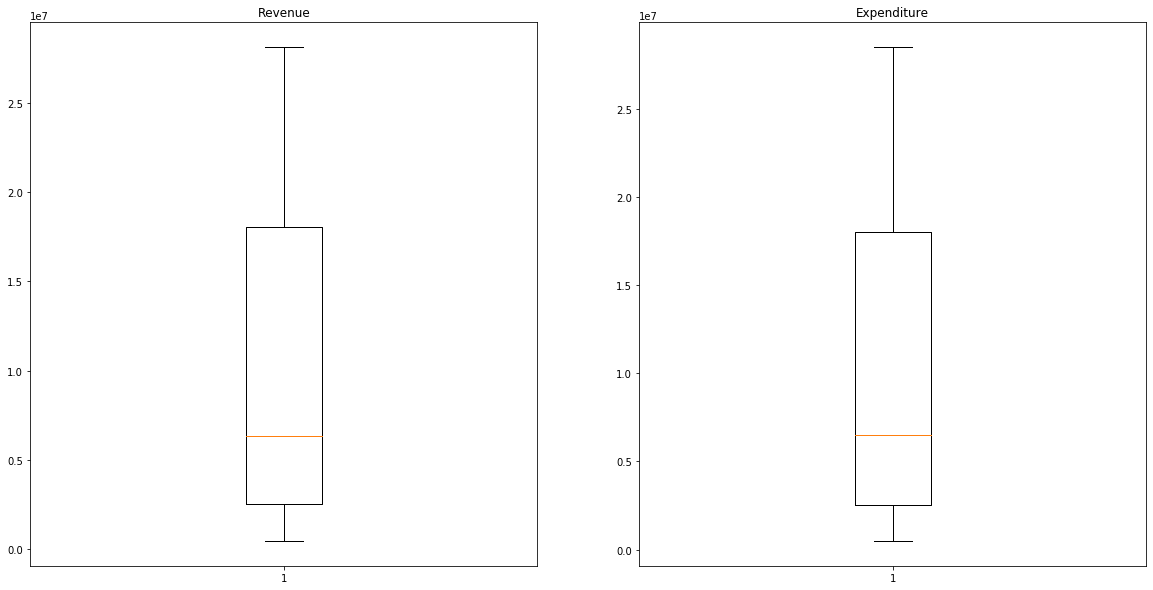

In [24]:
#check visually
plt.subplots(figsize=(20,10))
plt.subplot(121)
ax = plt.boxplot(winsorize_revenue)
plt.title('Revenue')
plt.subplot(122)
ax1 = plt.boxplot(winsorize_expenditure)
plt.title('Expenditure')

## Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [36]:
budget_defecit = education2['TOTAL_REVENUE'] - education2['TOTAL_EXPENDITURE']

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f255780>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f255e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1f255358>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f25d550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f25d898>],
 'means': []}

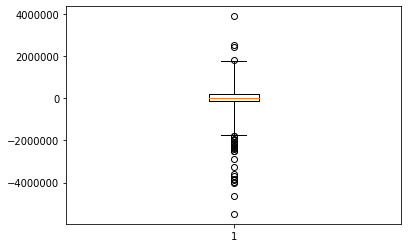

In [38]:
plt.boxplot(budget_defecit, whis=5)

In [44]:
winsorized_budget_defecit = winsorize(budget_defecit, (.10, .05))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1dbdba20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1dbdb128>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1dbdbcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1c71eb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d5c85f8>],
 'means': []}

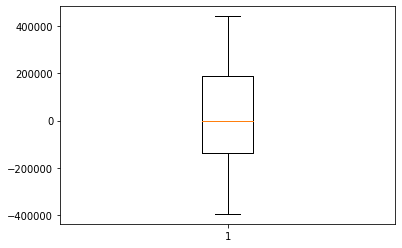

In [45]:
plt.boxplot(winsorized_budget_defecit)

In [47]:
#check using tukey's range test
q75, q25 = np.percentile(winsorized_budget_defecit, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((winsorized_budget_defecit > max_val) 
                      | winsorized_budget_defecit < min_val))[0]))
    )

The score threshold is: 1.0


TypeError: ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

In [49]:
winsorized_budget_defecit2 = winsorize_revenue - winsorize_expenditure

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1db9f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1db9fda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1db9f278>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1db8f470>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1db8f860>],
 'means': []}

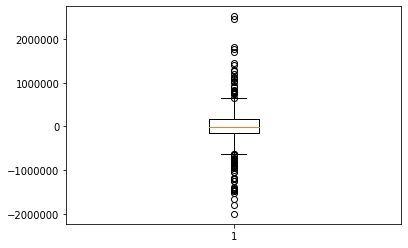

In [50]:
plt.boxplot(winsorized_budget_defecit2)

In [51]:
winsorized_budget_defecit2 = winsorize(winsorized_budget_defecit2, (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f42ac50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f441390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1f42a828>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f441a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f441d68>],
 'means': []}

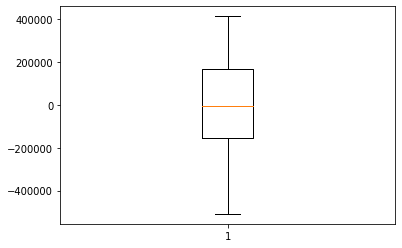

In [52]:
plt.boxplot(winsorized_budget_defecit2)

## Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [58]:
pd.DataFrame({'Original budget': budget_defecit, 'Windsorized budget 1': winsorized_budget_defecit, 'Winsorized budget 2': winsorized_budget_defecit2}).describe()

,Original budget,Windsorized budget 1,Winsorized budget 2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,22813.382038,5979.659517
std,5.607748e+05,257717.027997,268064.378117
min,-5.487742e+06,-395270.000000,-509360.000000
25%,-1.368148e+05,-136814.750000,-152551.500000
50%,-5.355000e+02,-535.500000,-3443.500000
75%,1.876285e+05,187628.500000,168423.500000
max,3.897129e+06,442351.000000,414013.000000


The mean and the median are significantly different when using the 2 different methods. The mean, median, and iqr differ.

## If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

My opinion is that the 3rd method is the appropriate method. That way we aren't eliminating outliers before comparing the two columns.